## Pre_prossesing

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
#from hawkeslib.model.mv_exp import MultivariateExpHawkesProcess as MVHP


message_data_path = "../data/message_data.csv"
orderbook_data_path = "../data/orderbook_data.csv"

message_data = pd.read_csv(message_data_path, header=None)
lob_data = pd.read_csv(orderbook_data_path, header=None)



Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
message_data.columns = ['Time', 'Type', 'OrderID', 'Size', 'Price', 'Direction']

message_data.head()

Time  Type   OrderID  Size    Price  Direction
0  34200.004241     1  16113575    18  5853300          1
1  34200.004261     1  16113584    18  5853200          1
2  34200.004447     1  16113594    18  5853100          1
3  34200.025552     1  16120456    18  5859100         -1
4  34200.025580     1  16120480    18  5859200         -1

In [3]:
def rename_lob_columns(data):
    cols = ['ask_price', 'ask_size', 'bid_price', 'bid_size']
    new_column_names = []
    num_levels = len(data.columns) // len(cols) # how many group of 4
    for i in range(num_levels):
        new_column_names.extend(f"{name}_{i+1}" for name in cols)

    # Rename the columns
    data.columns = new_column_names
    return data

lob_data = rename_lob_columns(lob_data)
lob_data.head()

ask_price_1  ask_size_1  bid_price_1  bid_size_1  ask_price_2  ask_size_2  \
0      5859400         200      5853300          18      5859800         200   
1      5859400         200      5853300          18      5859800         200   
2      5859400         200      5853300          18      5859800         200   
3      5859100          18      5853300          18      5859400         200   
4      5859100          18      5853300          18      5859200          18   

   bid_price_2  bid_size_2  ask_price_3  ask_size_3  ...  bid_price_8  \
0      5853000         150      5861000         200  ...      5845300   
1      5853200          18      5861000         200  ...      5846500   
2      5853200          18      5861000         200  ...      5849300   
3      5853200          18      5859800         200  ...      5849300   
4      5853200          18      5859400         200  ...      5849300   

   bid_size_8  ask_price_9  ask_size_9  bid_price_9  bid_size_9  ask_price_10  \
0         300      5876500        1160      5843800         200       5879000   
1         300      5876500        1160      5845300         300       5879000   
2         300      5876500        1160      5846500         300       5879000   
3         300      5873900         100      5846500         300       5876500   
4         300      5871000          10      5846500         300       5873900   

   ask_size_10  bid_price_10  bid_size_10  
0          500       5842700          300  
1          500       5843800          200  
2          500       5845300          300  
3         1160       5845300          300  
4          100       5845300          300  

[5 rows x 40 columns]

In [4]:
# merge
lob_data['Time'] = message_data['Time']
merge_df = lob_data.merge(message_data, on='Time', how='inner')
merge_df.head()

ask_price_1  ask_size_1  bid_price_1  bid_size_1  ask_price_2  ask_size_2  \
0      5859400         200      5853300          18      5859800         200   
1      5859400         200      5853300          18      5859800         200   
2      5859400         200      5853300          18      5859800         200   
3      5859100          18      5853300          18      5859400         200   
4      5859100          18      5853300          18      5859200          18   

   bid_price_2  bid_size_2  ask_price_3  ask_size_3  ...  ask_price_10  \
0      5853000         150      5861000         200  ...       5879000   
1      5853200          18      5861000         200  ...       5879000   
2      5853200          18      5861000         200  ...       5879000   
3      5853200          18      5859800         200  ...       5876500   
4      5853200          18      5859400         200  ...       5873900   

   ask_size_10  bid_price_10  bid_size_10          Time  Type   OrderID  Size  \
0          500       5842700          300  34200.004241     1  16113575    18   
1          500       5843800          200  34200.004261     1  16113584    18   
2          500       5845300          300  34200.004447     1  16113594    18   
3         1160       5845300          300  34200.025552     1  16120456    18   
4          100       5845300          300  34200.025580     1  16120480    18   

     Price  Direction  
0  5853300          1  
1  5853200          1  
2  5853100          1  
3  5859100         -1  
4  5859200         -1  

[5 rows x 46 columns]

In [5]:
# Delete Type==5
merge_df = merge_df[merge_df['Type'] != 5]

# Compute the mid_price
merge_df['mid_price'] = (merge_df['ask_price_1'] + merge_df['bid_price_1']) / 2

# Calculate the  directtion

merge_df['calc_direction'] = np.where(merge_df['mid_price']< merge_df['Price'], 'Buy', 'Sell')

merge_df.drop('Direction', axis=1, inplace=True)

merge_df.head()

ask_price_1  ask_size_1  bid_price_1  bid_size_1  ask_price_2  ask_size_2  \
0      5859400         200      5853300          18      5859800         200   
1      5859400         200      5853300          18      5859800         200   
2      5859400         200      5853300          18      5859800         200   
3      5859100          18      5853300          18      5859400         200   
4      5859100          18      5853300          18      5859200          18   

   bid_price_2  bid_size_2  ask_price_3  ask_size_3  ...  ask_size_10  \
0      5853000         150      5861000         200  ...          500   
1      5853200          18      5861000         200  ...          500   
2      5853200          18      5861000         200  ...          500   
3      5853200          18      5859800         200  ...         1160   
4      5853200          18      5859400         200  ...          100   

   bid_price_10  bid_size_10          Time  Type   OrderID  Size    Price  \
0       5842700          300  34200.004241     1  16113575    18  5853300   
1       5843800          200  34200.004261     1  16113584    18  5853200   
2       5845300          300  34200.004447     1  16113594    18  5853100   
3       5845300          300  34200.025552     1  16120456    18  5859100   
4       5845300          300  34200.025580     1  16120480    18  5859200   

   mid_price  calc_direction  
0  5856350.0            Sell  
1  5856350.0            Sell  
2  5856350.0            Sell  
3  5856200.0             Buy  
4  5856200.0             Buy  

[5 rows x 47 columns]

In [6]:
# New col called event_type which map Type + calc_direction and output [1,2,3,4,5,6,7,8]
merge_df['event_type'] = merge_df['Type'].astype(str) + '_' + merge_df['calc_direction'].astype(str)
merge_df['event_type'] = merge_df['event_type'].replace(
    {'1_Sell': 1, '1_Buy': 2, '2_Sell': 3, '2_Buy': 4,
     '3_Sell': 5, '3_Buy': 6, '4_Sell': 7, '4_Buy': 8}
)

merge_df['event_type'].unique()


/var/folders/y5/f3yrmbzn2jq1rcxqy582qldm0000gn/T/ipykernel_28844/1001220004.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merge_df['event_type'] = merge_df['event_type'].replace(


array([1, 2, 5, 6, 7, 8, 4, 3])

In [7]:
merge_df.head()

ask_price_1  ask_size_1  bid_price_1  bid_size_1  ask_price_2  ask_size_2  \
0      5859400         200      5853300          18      5859800         200   
1      5859400         200      5853300          18      5859800         200   
2      5859400         200      5853300          18      5859800         200   
3      5859100          18      5853300          18      5859400         200   
4      5859100          18      5853300          18      5859200          18   

   bid_price_2  bid_size_2  ask_price_3  ask_size_3  ...  bid_price_10  \
0      5853000         150      5861000         200  ...       5842700   
1      5853200          18      5861000         200  ...       5843800   
2      5853200          18      5861000         200  ...       5845300   
3      5853200          18      5859800         200  ...       5845300   
4      5853200          18      5859400         200  ...       5845300   

   bid_size_10          Time  Type   OrderID  Size    Price  mid_price  \
0          300  34200.004241     1  16113575    18  5853300  5856350.0   
1          200  34200.004261     1  16113584    18  5853200  5856350.0   
2          300  34200.004447     1  16113594    18  5853100  5856350.0   
3          300  34200.025552     1  16120456    18  5859100  5856200.0   
4          300  34200.025580     1  16120480    18  5859200  5856200.0   

   calc_direction  event_type  
0            Sell           1  
1            Sell           1  
2            Sell           1  
3             Buy           2  
4             Buy           2  

[5 rows x 48 columns]

In [8]:
df_hawkes = merge_df[['Time', 'event_type']]
df_hawkes.head()

Time  event_type
0  34200.004241           1
1  34200.004261           1
2  34200.004447           1
3  34200.025552           2
4  34200.025580           2

# Poisson

In [9]:
import pandas as pd
import numpy as np

def generate_poisson_events(rate, time_duration):
    num_events = np.random.poisson(rate * time_duration)
    inter_arrival_times = np.random.exponential(1.0 / rate, num_events)
    event_times = np.cumsum(inter_arrival_times)
    return num_events, event_times, inter_arrival_times

def plot_non_sequential_poisson(num_events, event_times, inter_arrival_times, rate, time_duration):
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle(f'Poisson Process Simulation (λ = {rate}, Duration = {time_duration} seconds)\n', fontsize=16)

    axs[0].step(event_times, np.arange(1, num_events + 1), where='post', color='blue')
    axs[0].set_xlabel('Time')
    axs[0].set_ylabel('Event Number')
    axs[0].set_title(f'Poisson Process Event Times\nTotal: {num_events} events\n')
    axs[0].grid(True)

    axs[1].hist(inter_arrival_times, bins=20, color='green', alpha=0.5)
    axs[1].set_xlabel('Inter-Arrival Time')
    axs[1].set_ylabel('Frequency')
    axs[1].set_title(f'Histogram of Inter-Arrival Times\nMEAN: {np.mean(inter_arrival_times):.2f} | STD: {np.std(inter_arrival_times):.2f}\n')
    axs[1].grid(True, alpha=0.5)
    
    plt.tight_layout()
    plt.show()
    return num_events, event_times, inter_arrival_times

def plot_sequential_poisson(num_events_list, event_times_list, inter_arrival_times_list, rate, time_duration):
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle(f'Poisson Process Simulation (Duration = {time_duration} seconds)\n', fontsize=16)

    axs[0].set_xlabel('Time')
    axs[0].set_ylabel('Event Number')
    axs[0].set_title(f'Poisson Process Event Times')
    axs[0].grid(True)

    axs[1].set_xlabel('Inter-Arrival Time')
    axs[1].set_ylabel('Frequency')
    axs[1].set_title(f'Histogram of Inter-Arrival Times')
    axs[1].grid(True, alpha=0.5)

    color_palette = plt.get_cmap('tab20')
    colors = [color_palette(i) for i in range(len(rate))]

    for n, individual_rate in enumerate(rate):
        num_events = num_events_list[n]
        event_times = event_times_list[n]
        inter_arrival_times = inter_arrival_times_list[n]

        axs[0].step(event_times, np.arange(1, num_events + 1), where='post', color=colors[n], label=f'λ = {individual_rate}, Total Events: {num_events}')
        axs[1].hist(inter_arrival_times, bins=20, color=colors[n], alpha=0.5, label=f'λ = {individual_rate}, MEAN: {np.mean(inter_arrival_times):.2f}, STD: {np.std(inter_arrival_times):.2f}')

    axs[0].legend()
    axs[1].legend()

    plt.tight_layout()
    plt.show()
    return num_events_list, event_times_list, inter_arrival_times_list

def poisson_simulation(rate, time_duration, show_visualization=True):
    if isinstance(rate, (int, float)):
        num_events, event_times, inter_arrival_times = generate_poisson_events(rate, time_duration)
        if show_visualization:
            plot_non_sequential_poisson(num_events, event_times, inter_arrival_times, rate, time_duration)
        return num_events, event_times, inter_arrival_times

    elif isinstance(rate, list):
        num_events_list = []
        event_times_list = []
        inter_arrival_times_list = []

        for individual_rate in rate:
            num_events, event_times, inter_arrival_times = generate_poisson_events(individual_rate, time_duration)
            num_events_list.append(num_events)
            event_times_list.append(event_times)
            inter_arrival_times_list.append(inter_arrival_times)

        if show_visualization:
            plot_sequential_poisson(num_events_list, event_times_list, inter_arrival_times_list, rate, time_duration)
        return num_events_list, event_times_list, inter_arrival_times_list




In [10]:
df_hawkes.shape

(430266, 2)

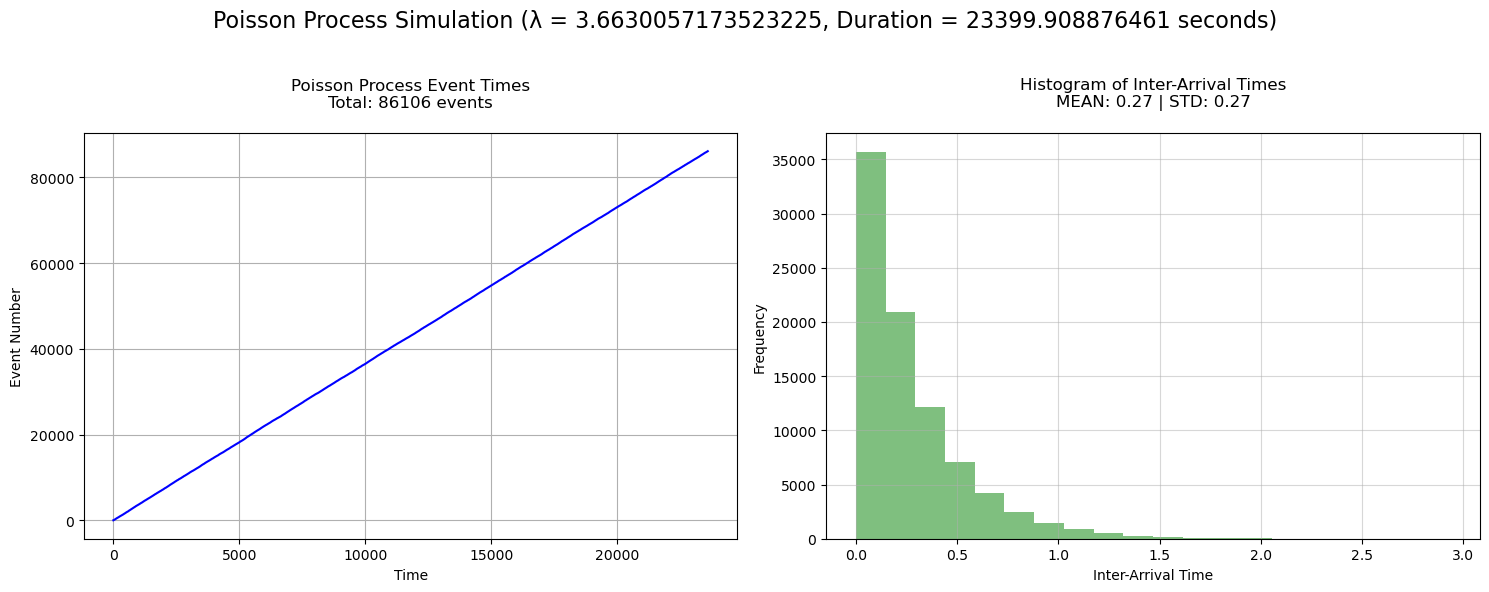

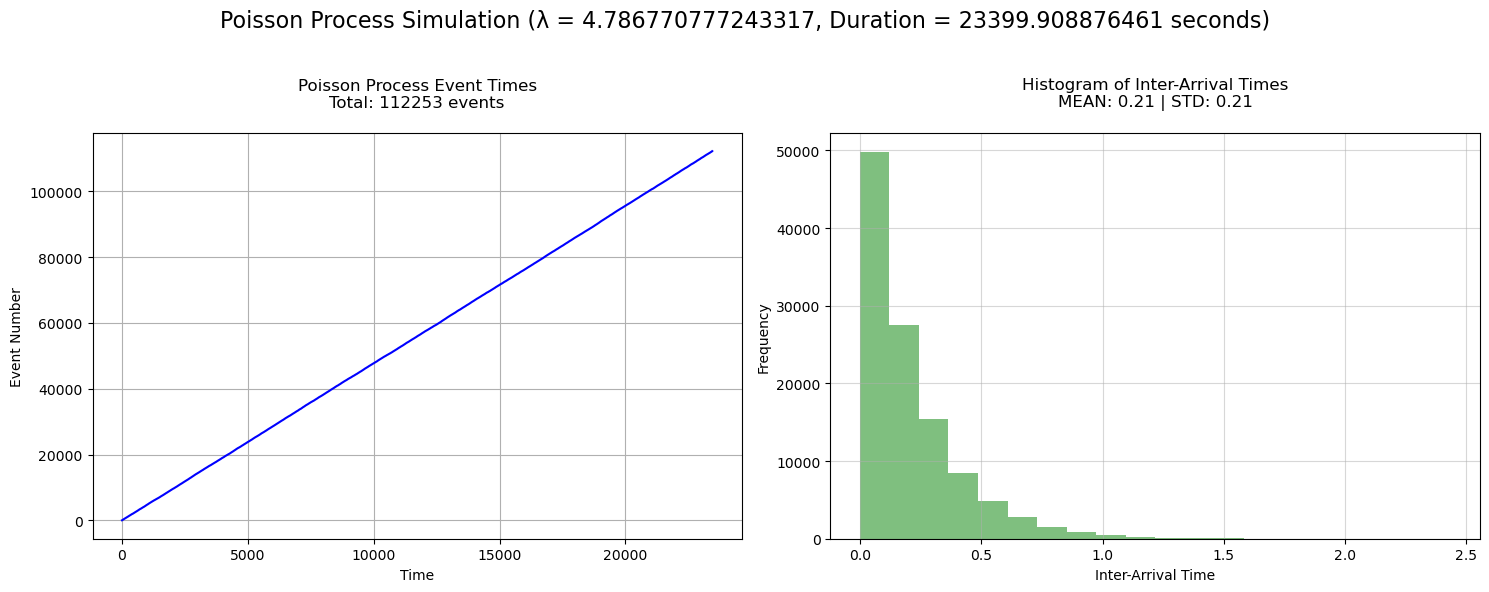

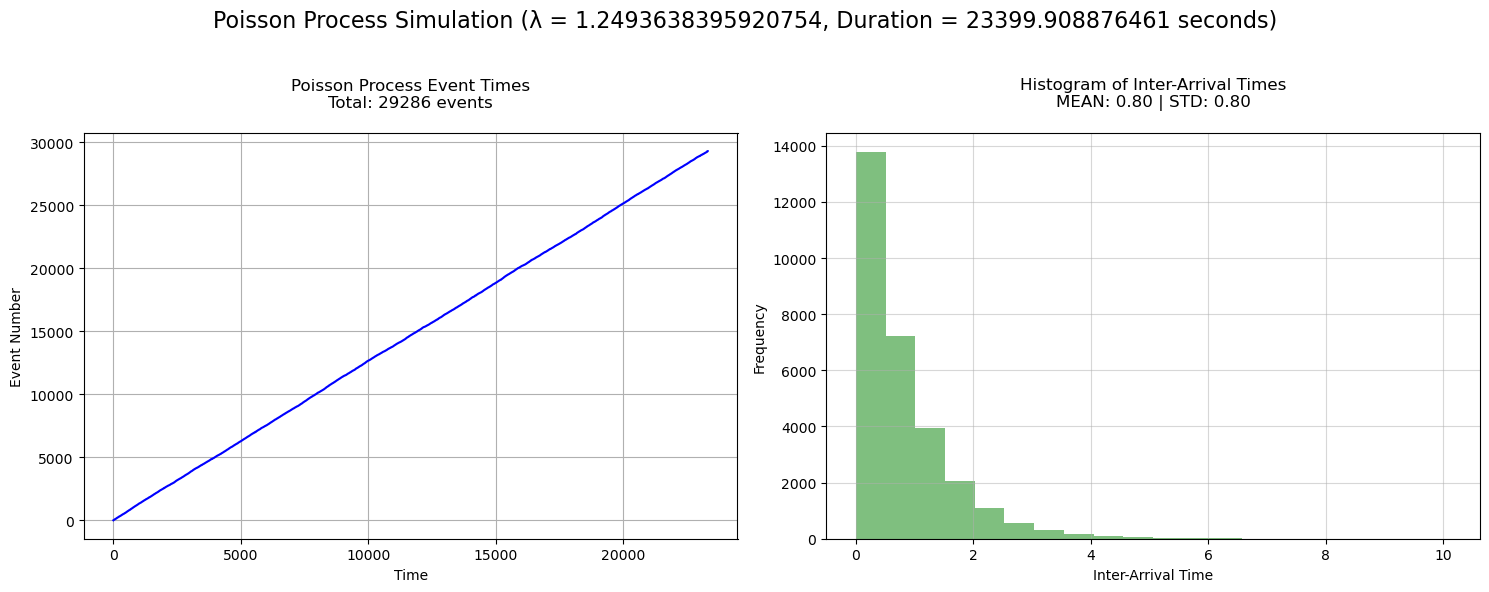

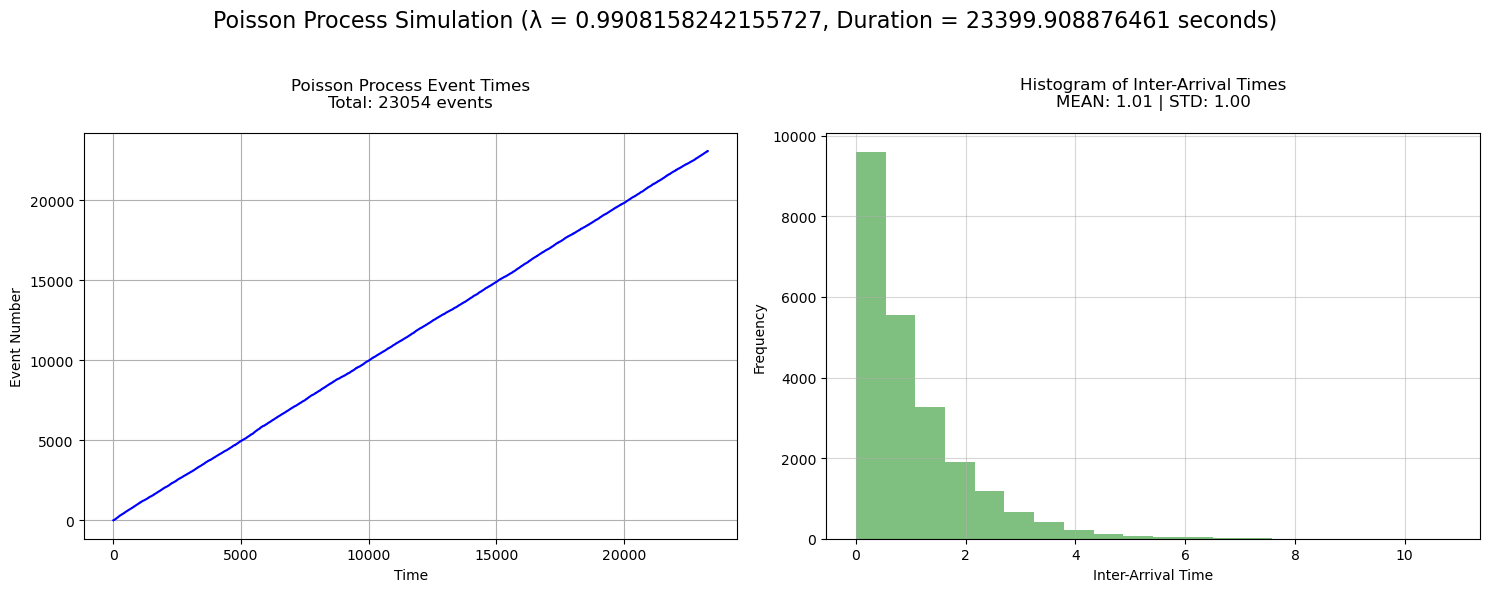

In [11]:
df_hawkes.head()
#Count number of event_type == 1
time_duration = df_hawkes['Time'].max() - df_hawkes['Time'].min()
type_1_count = df_hawkes[df_hawkes['event_type'] == 1].value_counts().sum() #len(df_hawkes[df_hawkes['event_type'] == 1])
type_2_count = df_hawkes[df_hawkes['event_type'] == 2].value_counts().sum()
type_3_count = df_hawkes[df_hawkes['event_type'] == 2].value_counts().sum()
type_4_count = df_hawkes[df_hawkes['event_type'] == 2].value_counts().sum()
type_5_count = df_hawkes[df_hawkes['event_type'] == 2].value_counts().sum()
type_6_count = df_hawkes[df_hawkes['event_type'] == 2].value_counts().sum()
type_7_count = df_hawkes[df_hawkes['event_type'] == 7].value_counts().sum()
type_8_count = df_hawkes[df_hawkes['event_type'] == 8].value_counts().sum()

count_types_list = [type_1_count, type_2_count, type_7_count, type_8_count]

sim_results = {}

for type in count_types_list:
    # Compute the rate
    rate = type / time_duration
    # Simulate
    num_events_list, event_times_list, inter_arrival_times_list = poisson_simulation(rate, time_duration, show_visualization=True)
    #Store the results
    sim_results[type] = {
        'num_events': num_events_list,
        'event_times': event_times_list,
        'inter_arrival_times': inter_arrival_times_list
    }


# rate = type_1_count / time_duration
# print(type_1_count)
# print(time_duration)
# print(rate)


In [12]:
# Calculate the time duration for the whole dataset
time_duration = int(df_hawkes["Time"].max() - df_hawkes["Time"].min())

# Get counts for each type of event
event_types = df_hawkes['event_type'].unique()
event_counts = {etype: df_hawkes[df_hawkes['event_type'] == etype].shape[0] for etype in event_types}

# Run simulations for each event type
sim_results = {}
for event_type, count in event_counts.items():
    rate = count / time_duration
    num_events, event_times, inter_arrival_times = poisson_simulation(rate, time_duration, show_visualization=False)
    sim_results[event_type] = {
        'num_events': num_events,
        'event_times': event_times,
        'inter_arrival_times': inter_arrival_times
    }

In [13]:
# Prepare a DataFrame to store probabilities
timestamps = np.linspace(0, time_duration, num=time_duration + 1)  # Uniform time intervals
probabilities = pd.DataFrame(index=timestamps[:-1])  # Use all but the last element to match histogram output

total_counts_per_bin = np.zeros(len(timestamps) - 1)

# First, accumulate counts from all histograms to normalize later
for event_type, data in sim_results.items():
    event_times = data['event_times']
    hist, _ = np.histogram(event_times, bins=timestamps)
    total_counts_per_bin += hist

# Now, calculate probabilities for each event type at each timestamp
for event_type, data in sim_results.items():
    event_times = data['event_times']
    hist, bins = np.histogram(event_times, bins=timestamps)
    probabilities[event_type] = hist / total_counts_per_bin  # Normalize by total counts per bin

# Fill NaN values that may result from division by zero (no events at all in some bins)
probabilities.fillna(0, inplace=True)

# Check if rows sum to 1
row_sums = probabilities.sum(axis=1)
print("Do rows sum to 1?", np.allclose(row_sums, 1, atol=1e-2))  # Using a tolerance for floating-point arithmetic


Do rows sum to 1? True


In [14]:
probabilities.head()

1         2         5         6         7      8    4     3
0.0  0.120000  0.240000  0.080000  0.400000  0.120000  0.000  0.0  0.04
1.0  0.200000  0.000000  0.100000  0.600000  0.000000  0.100  0.0  0.00
2.0  0.166667  0.291667  0.166667  0.166667  0.083333  0.125  0.0  0.00
3.0  0.444444  0.333333  0.000000  0.222222  0.000000  0.000  0.0  0.00
4.0  0.150000  0.150000  0.300000  0.400000  0.000000  0.000  0.0  0.00

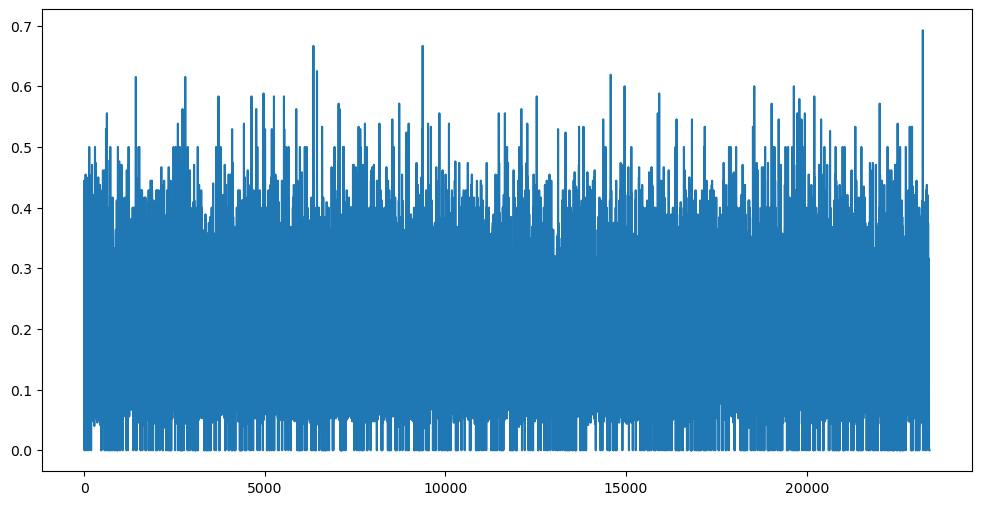

In [15]:
# plot probabilities of type 1
plt.figure(figsize=(12, 6))
plt.plot(probabilities.index, probabilities[1], label='Type 1')
plt.show()

# Sampling Price

In [16]:
probabilities.shape

(23399, 8)

In [17]:
check = pd.DataFrame(probabilities)
check['Time'] = merge_df['Time']
check.shape

(23399, 9)

In [18]:
check.head()

1         2         5         6         7      8    4     3  \
0.0  0.120000  0.240000  0.080000  0.400000  0.120000  0.000  0.0  0.04   
1.0  0.200000  0.000000  0.100000  0.600000  0.000000  0.100  0.0  0.00   
2.0  0.166667  0.291667  0.166667  0.166667  0.083333  0.125  0.0  0.00   
3.0  0.444444  0.333333  0.000000  0.222222  0.000000  0.000  0.0  0.00   
4.0  0.150000  0.150000  0.300000  0.400000  0.000000  0.000  0.0  0.00   

             Time  
0.0  34200.004241  
1.0  34200.004261  
2.0  34200.004447  
3.0  34200.025552  
4.0  34200.025580

In [19]:
merge_df.head()

price_sell_df = merge_df[merge_df['calc_direction'] == 'Sell'][['Time','mid_price']]
price_buy_df = merge_df[merge_df['calc_direction'] == 'Buy'][['Time','mid_price']]

# Resampling the data
price_sell_df['Time'] = pd.to_datetime(price_sell_df['Time'], unit='s')
price_sell_df.set_index('Time', inplace=True)
price_sell_df = price_sell_df.resample('1min').ohlc() # resample the data in 1 minute bins
# only take the mid price
price_sell_df = price_sell_df['mid_price']
price_sell_df = price_sell_df.add_suffix('_mid_price')
price_sell_df.head()

open_mid_price  high_mid_price  low_mid_price  \
Time                                                                 
1970-01-01 09:30:00       5856350.0       5858500.0      5853100.0   
1970-01-01 09:31:00       5855100.0       5856250.0      5847450.0   
1970-01-01 09:32:00       5851950.0       5854550.0      5849400.0   
1970-01-01 09:33:00       5854800.0       5870650.0      5852950.0   
1970-01-01 09:34:00       5868650.0       5877200.0      5868500.0   

                     close_mid_price  
Time                                  
1970-01-01 09:30:00        5855100.0  
1970-01-01 09:31:00        5850050.0  
1970-01-01 09:32:00        5854550.0  
1970-01-01 09:33:00        5868650.0  
1970-01-01 09:34:00        5873000.0

In [20]:
# Resample
price_buy_df['Time'] = pd.to_datetime(price_buy_df['Time'], unit='s')
price_buy_df.set_index('Time', inplace=True)
price_buy_df = price_buy_df.resample('1min').ohlc() # resample the data in 1 minute bins
# only take the mid price
price_buy_df = price_buy_df['mid_price']
price_buy_df = price_buy_df.add_suffix('_mid_price')
price_buy_df.head()

open_mid_price  high_mid_price  low_mid_price  \
Time                                                                 
1970-01-01 09:30:00       5856200.0       5858500.0      5853100.0   
1970-01-01 09:31:00       5855100.0       5856250.0      5847350.0   
1970-01-01 09:32:00       5850350.0       5854800.0      5849250.0   
1970-01-01 09:33:00       5855400.0       5870450.0      5852950.0   
1970-01-01 09:34:00       5868650.0       5877200.0      5868600.0   

                     close_mid_price  
Time                                  
1970-01-01 09:30:00        5854950.0  
1970-01-01 09:31:00        5850750.0  
1970-01-01 09:32:00        5854800.0  
1970-01-01 09:33:00        5868500.0  
1970-01-01 09:34:00        5873000.0

In [21]:
price_sell_df['returns'] = (price_sell_df['close_mid_price'] - price_sell_df['close_mid_price'].shift(1)) / price_sell_df['close_mid_price'].shift(1)

price_buy_df['returns'] = (price_buy_df['close_mid_price'] - price_buy_df['close_mid_price'].shift(1)) / price_buy_df['close_mid_price'].shift(1)

In [22]:
from scipy.stats import norm, weibull_min


# def sampling_price(df, df_price_col ,num_samples=390):
#     seed = 42
#     np.random.seed(seed)
#     #Compute w/mle
#     mean_returns_mle, std_returns_mle = norm.fit(df[df_price_col].dropna())

#     #Generate sample directly from the gaussian distribution
#     sample_gaussian_returns = np.random.normal(loc=mean_returns_mle, scale=std_returns_mle, size=num_samples)
#     #print(f"First sample return {sample_gaussian_returns[0]}")
#     # Simulate Stock Price trajectory
#     # Start from the last price in the lob dataset
#     start_price = df['close_mid_price'].iloc[0] #-1
#     # Initialize the simulated price list
#     sim_prices = [start_price]

#     for r in sample_gaussian_returns:
#         #calculate the new price based on the previous price
#         new_price = sim_prices[-1] * (1 + r)
#         #append to the list
#         sim_prices.append(new_price)
#     return sim_prices

def sampling_return_price(df, df_price_col, num_samples=390):
    seed = 42
    np.random.seed(seed)
    #Compute w/mle 
    mean_returns_mle, std_returns_mle = norm.fit(df[df_price_col].dropna()) #std_returns_mle

    #Generate sample directly from the gaussian distribution
    sample_gaussian_returns = np.random.normal(loc=mean_returns_mle,scale=std_returns_mle ,size=num_samples) #scale=std_returns_mle
 
    return sample_gaussian_returns

import numpy as np
from scipy.stats import weibull_min

def sampling_return_price_weibull(df, df_price_col, num_samples=390):
    seed = 42
    np.random.seed(seed)
    
    # Drop NA values from the specified column
    data_clean = df[df_price_col].dropna()
    
    # Fit Weibull distribution to data
    # scipy's fit function returns the shape parameter (c), location parameter (loc), and scale parameter (scale) for the Weibull distribution
    c, loc, scale = weibull_min.fit(data_clean, floc=0)  # Here floc=0 fixes the location at zero, typical for Weibull

    # Generate samples directly from the fitted Weibull distribution
    sample_weibull_returns = weibull_min.rvs(c, loc, scale, size=num_samples)

    return sample_weibull_returns

In [23]:
# Sample the price for sell direction
sim_returns_sell_norm = sampling_return_price(price_sell_df, 'returns', num_samples=len(price_sell_df))
# Sample the price for buy direction
sim_returns_buy_norm = sampling_return_price(price_buy_df, 'returns', num_samples=len(price_buy_df))

# Sample the price for sell direction
sim_returns_sell_wei = sampling_return_price(price_sell_df, 'returns', num_samples=len(price_sell_df))
# Sample the price for buy direction
sim_returns_buy_wei = sampling_return_price(price_buy_df, 'returns', num_samples=len(price_buy_df))



In [24]:
sim_returns_sell_wei

array([ 2.03177576e-04, -1.01249351e-04,  2.75559037e-04,  6.95222833e-04,
       -1.47221330e-04, -1.47213459e-04,  7.22158558e-04,  3.32968804e-04,
       -2.60040989e-04,  2.25157414e-04, -2.57137236e-04, -2.58245704e-04,
        8.10421998e-05, -9.52243029e-04, -8.61936673e-04, -3.04538278e-04,
       -5.20541829e-04,  1.15697736e-04, -4.70294319e-04, -7.12060470e-04,
        6.67712689e-04, -1.43205120e-04, -2.58650708e-06, -7.18026714e-04,
       -2.95954200e-04,  1.82180087e-05, -5.86780884e-04,  1.45158962e-04,
       -3.22924927e-04, -1.74807840e-04, -3.23436920e-04,  8.53073947e-04,
       -4.14324275e-05, -5.42058500e-04,  3.59390210e-04, -6.20269017e-04,
        6.51737426e-05, -9.74483671e-04, -6.71732049e-04,  5.94194666e-05,
        3.19080640e-04,  4.71974111e-05, -9.04065816e-05, -1.79319239e-04,
       -7.43807422e-04, -3.80075480e-04, -2.55804941e-04,  4.71853319e-04,
        1.29779018e-04, -8.80213610e-04,  1.20413703e-04, -2.19580987e-04,
       -3.59497339e-04,  

In [25]:
# Sampling the Volumes
merge_df.head()

ask_price_1  ask_size_1  bid_price_1  bid_size_1  ask_price_2  ask_size_2  \
0      5859400         200      5853300          18      5859800         200   
1      5859400         200      5853300          18      5859800         200   
2      5859400         200      5853300          18      5859800         200   
3      5859100          18      5853300          18      5859400         200   
4      5859100          18      5853300          18      5859200          18   

   bid_price_2  bid_size_2  ask_price_3  ask_size_3  ...  bid_price_10  \
0      5853000         150      5861000         200  ...       5842700   
1      5853200          18      5861000         200  ...       5843800   
2      5853200          18      5861000         200  ...       5845300   
3      5853200          18      5859800         200  ...       5845300   
4      5853200          18      5859400         200  ...       5845300   

   bid_size_10          Time  Type   OrderID  Size    Price  mid_price  \
0          300  34200.004241     1  16113575    18  5853300  5856350.0   
1          200  34200.004261     1  16113584    18  5853200  5856350.0   
2          300  34200.004447     1  16113594    18  5853100  5856350.0   
3          300  34200.025552     1  16120456    18  5859100  5856200.0   
4          300  34200.025580     1  16120480    18  5859200  5856200.0   

   calc_direction  event_type  
0            Sell           1  
1            Sell           1  
2            Sell           1  
3             Buy           2  
4             Buy           2  

[5 rows x 48 columns]

# Sampling the Volumes

In [26]:
vol_buy_lim_df = merge_df[merge_df['event_type'] == 1][['Time','Size']]
vol_sell_lim_df = merge_df[merge_df['event_type'] == 2][['Time','Size']]
vol_buy_mrkt_df = merge_df[merge_df['event_type'] == 7][['Time','Size']]
vol_sell_mrkt_df = merge_df[merge_df['event_type'] == 8][['Time','Size']]

# Resample
vol_buy_lim_df['Time'] = pd.to_datetime(vol_buy_lim_df['Time'], unit='s')
vol_buy_lim_df.set_index('Time', inplace=True)
vol_buy_lim_df = vol_buy_lim_df.resample('1min').ohlc() # resample the data in 1 minute bins
# only take the Volume/Size
vol_buy_lim_df = vol_buy_lim_df['Size']
vol_buy_lim_df = vol_buy_lim_df.add_suffix('Size')
vol_buy_lim_df.head()

# Resample
vol_sell_lim_df['Time'] = pd.to_datetime(vol_sell_lim_df['Time'], unit='s')
vol_sell_lim_df.set_index('Time', inplace=True)
vol_sell_lim_df = vol_sell_lim_df.resample('1min').ohlc() # resample the data in 1 minute bins
# only take the Volume/Size
vol_sell_lim_df = vol_sell_lim_df['Size']
vol_sell_lim_df = vol_sell_lim_df.add_suffix('Size')
vol_sell_lim_df.head()

# Resample
vol_buy_mrkt_df['Time'] = pd.to_datetime(vol_buy_mrkt_df['Time'], unit='s')
vol_buy_mrkt_df.set_index('Time', inplace=True)
vol_buy_mrkt_df = vol_buy_mrkt_df.resample('1min').ohlc() # resample the data in 1 minute bins
# only take the Volume/Size
vol_buy_mrkt_df = vol_buy_mrkt_df['Size']
vol_buy_mrkt_df = vol_buy_mrkt_df.add_suffix('Size')
vol_buy_mrkt_df.head()

# Resample
vol_sell_mrkt_df['Time'] = pd.to_datetime(vol_sell_mrkt_df['Time'], unit='s')
vol_sell_mrkt_df.set_index('Time', inplace=True)
vol_sell_mrkt_df = vol_sell_mrkt_df.resample('1min').ohlc() # resample the data in 1 minute bins
# only take the Volume/Size
vol_sell_mrkt_df = vol_sell_mrkt_df['Size']
vol_sell_mrkt_df = vol_sell_mrkt_df.add_suffix('Size')
vol_sell_mrkt_df.head()


openSize  highSize  lowSize  closeSize
Time                                                       
1970-01-01 09:30:00      25.0     300.0      2.0        7.0
1970-01-01 09:31:00      84.0     100.0      2.0      100.0
1970-01-01 09:32:00      47.0     100.0     15.0      100.0
1970-01-01 09:33:00      97.0     449.0      1.0      449.0
1970-01-01 09:34:00       3.0     390.0      2.0      100.0

In [27]:
from scipy.stats import gamma

def sampling_volume_gamma(df, df_vol_col, num_samples=390):
    seed = 42
    np.random.seed(seed)
    
    # Drop NA values from the specified column
    data_clean = df[df_vol_col].dropna()
    
    # Fit Weibull distribution to data
    # scipy's fit function returns the shape parameter (c), location parameter (loc), and scale parameter (scale) for the Weibull distribution
    c, loc, scale = gamma.fit(data_clean)  # Here floc=0 fixes the location at zero, typical for Weibull

    # Generate samples directly from the fitted Weibull distribution
    sample_gamma_volume = gamma.rvs(c, loc, scale, size=num_samples)

    return sample_gamma_volume

In [28]:
vol_buy_lim_df.head()

openSize  highSize  lowSize  closeSize
Time                                                       
1970-01-01 09:30:00        18       300        1          2
1970-01-01 09:31:00       100       500        2        100
1970-01-01 09:32:00       100      2000        1        253
1970-01-01 09:33:00       253       400        1        100
1970-01-01 09:34:00       100       700        2        200

In [29]:
# Sample the price for sell direction
sim_vol_buy_lim_gam = sampling_volume_gamma(vol_buy_lim_df, 'closeSize', num_samples=len(vol_buy_lim_df))

sim_vol_sell_lim_gam = sampling_volume_gamma(vol_sell_lim_df, 'closeSize', num_samples=len(vol_sell_lim_df))

sim_vol_buy_mrkt_gam = sampling_volume_gamma(vol_buy_mrkt_df, 'closeSize', num_samples=len(vol_buy_mrkt_df))

sim_vol_sell_mrkt_gam = sampling_volume_gamma(vol_sell_mrkt_df, 'closeSize', num_samples=len(vol_sell_mrkt_df))


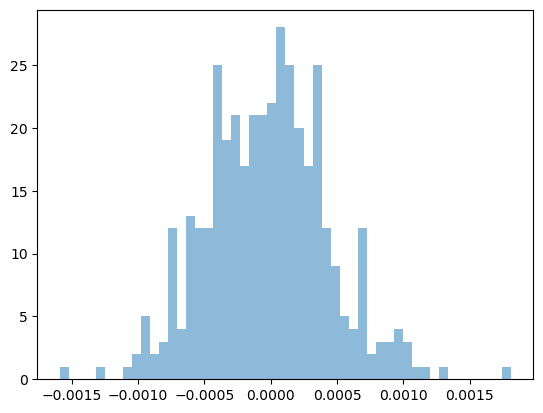

In [30]:
# plot the distribution of the sim_vol_buy_lim_gam
plt.hist(sim_returns_buy_wei, bins=50, alpha=0.5, label='Volume Buy Limit')
plt.show()

# Algorithm putting everything together

In [31]:
poisson_df = check

#set Time as index in poisson_df
poisson_df.set_index('Time', inplace=True)

print(poisson_df.shape)
poisson_df.head()

(23399, 8)


1         2         5         6         7      8    4  \
Time                                                                         
34200.004241  0.120000  0.240000  0.080000  0.400000  0.120000  0.000  0.0   
34200.004261  0.200000  0.000000  0.100000  0.600000  0.000000  0.100  0.0   
34200.004447  0.166667  0.291667  0.166667  0.166667  0.083333  0.125  0.0   
34200.025552  0.444444  0.333333  0.000000  0.222222  0.000000  0.000  0.0   
34200.025580  0.150000  0.150000  0.300000  0.400000  0.000000  0.000  0.0   

                 3  
Time                
34200.004241  0.04  
34200.004261  0.00  
34200.004447  0.00  
34200.025552  0.00  
34200.025580  0.00

In [32]:
print(merge_df.shape)
merge_df.head()

(430266, 48)


ask_price_1  ask_size_1  bid_price_1  bid_size_1  ask_price_2  ask_size_2  \
0      5859400         200      5853300          18      5859800         200   
1      5859400         200      5853300          18      5859800         200   
2      5859400         200      5853300          18      5859800         200   
3      5859100          18      5853300          18      5859400         200   
4      5859100          18      5853300          18      5859200          18   

   bid_price_2  bid_size_2  ask_price_3  ask_size_3  ...  bid_price_10  \
0      5853000         150      5861000         200  ...       5842700   
1      5853200          18      5861000         200  ...       5843800   
2      5853200          18      5861000         200  ...       5845300   
3      5853200          18      5859800         200  ...       5845300   
4      5853200          18      5859400         200  ...       5845300   

   bid_size_10          Time  Type   OrderID  Size    Price  mid_price  \
0          300  34200.004241     1  16113575    18  5853300  5856350.0   
1          200  34200.004261     1  16113584    18  5853200  5856350.0   
2          300  34200.004447     1  16113594    18  5853100  5856350.0   
3          300  34200.025552     1  16120456    18  5859100  5856200.0   
4          300  34200.025580     1  16120480    18  5859200  5856200.0   

   calc_direction  event_type  
0            Sell           1  
1            Sell           1  
2            Sell           1  
3             Buy           2  
4             Buy           2  

[5 rows x 48 columns]

In [33]:
poisson_df.shape

(23399, 8)

In [34]:
merge_df.shape

(430266, 48)

In [35]:
import random

def simulate_market(start_price, poisson_df, 
                    sim_returns_buy_wei, sim_returns_sell_wei, 
                    sim_vol_buy_lim_gam, sim_vol_sell_lim_gam, 
                    sim_vol_buy_mrkt_gam, sim_vol_sell_mrkt_gam):
    
    results = []
    
    # Iterate through each row and column properly
    for index, row in poisson_df.iterrows():
        for col in poisson_df.columns:
            if row[col] > 0.5:  # Check if the probability is greater than 0.5
                order_type = int(col)  # Assuming column names are strings that represent integers
                if order_type == 1:
                    # Buy Limit
                    return_price = random.choice(sim_returns_buy_wei)
                    price = start_price * (1 + return_price)
                    volume = random.choice(sim_vol_buy_lim_gam)
                    results.append({'Time': index, 'OrderType': 1, 'Price': price, 'Volume': volume})

                elif order_type == 2:
                    # Sell Limit
                    return_price = random.choice(sim_returns_sell_wei)
                    price = start_price * (1 + return_price)
                    volume = random.choice(sim_vol_sell_lim_gam)
                    results.append({'Time': index, 'OrderType': 2, 'Price': price, 'Volume': volume})

                elif order_type == 7:
                    # Buy Market
                    return_price = random.choice(sim_returns_buy_wei)
                    price = start_price * (1 + return_price)
                    volume = random.choice(sim_vol_buy_mrkt_gam)
                    results.append({'Time': index, 'OrderType': 7, 'Price': price, 'Volume': volume})

                elif order_type == 8:
                    # Sell Market
                    return_price = random.choice(sim_returns_sell_wei)
                    price = start_price * (1 + return_price)
                    volume = random.choice(sim_vol_sell_mrkt_gam)
                    results.append({'Time': index, 'OrderType': 8, 'Price': price, 'Volume': volume})

                    # Update the starting price for the next iteration based on the last transaction
                    start_price = price

    return results


In [36]:
sim_data = simulate_market(585.0, poisson_df, sim_returns_buy_wei, sim_returns_sell_wei, sim_vol_buy_lim_gam, sim_vol_sell_lim_gam, sim_vol_buy_mrkt_gam, sim_vol_sell_mrkt_gam)
sim_data

[{'Time': 34200.271739507,
  'OrderType': 2,
  'Price': 584.7888238491929,
  'Volume': 136.54944476644496},
 {'Time': 34200.271739507,
  'OrderType': 2,
  'Price': 585.1236469379066,
  'Volume': 26.692272189723674},
 {'Time': 34200.275072491,
  'OrderType': 2,
  'Price': 584.6343321707508,
  'Volume': 125.84680918625713},
 {'Time': nan,
  'OrderType': 2,
  'Price': 584.5287034371993,
  'Volume': 32.445963841619594},
 {'Time': 34200.275072491,
  'OrderType': 2,
  'Price': 584.7500646055412,
  'Volume': 75.13854144087362},
 {'Time': 34200.763059946,
  'OrderType': 2,
  'Price': 584.8495747170481,
  'Volume': 14.91903909680935},
 {'Time': 34201.015180053,
  'OrderType': 2,
  'Price': 584.8956861984659,
  'Volume': 233.11481471762184},
 {'Time': 34201.015508486,
  'OrderType': 1,
  'Price': 585.0009054165791,
  'Volume': 0.9999999999999998},
 {'Time': 34201.151828026,
  'OrderType': 1,
  'Price': 584.8110585030335,
  'Volume': 0.9999999999999998},
 {'Time': 34201.151828026,
  'OrderType': 

In [37]:
# Convert the simulation data to a DataFrame
sim_df = pd.DataFrame(sim_data)
sim_df.head(1000)

Time  OrderType       Price      Volume
0    34200.271740          2  584.788824  136.549445
1    34200.271740          2  585.123647   26.692272
2    34200.275072          2  584.634332  125.846809
3             NaN          2  584.528703   32.445964
4    34200.275072          2  584.750065   75.138541
..            ...        ...         ...         ...
367  35109.575530          2  584.895686   50.987840
368  35109.950515          2  584.811207   82.028446
369  35109.994488          2  585.118859   34.771797
370  35109.998043          2  585.580851    9.670934
371  35109.998754          2  585.172020   44.957625

[372 rows x 4 columns]

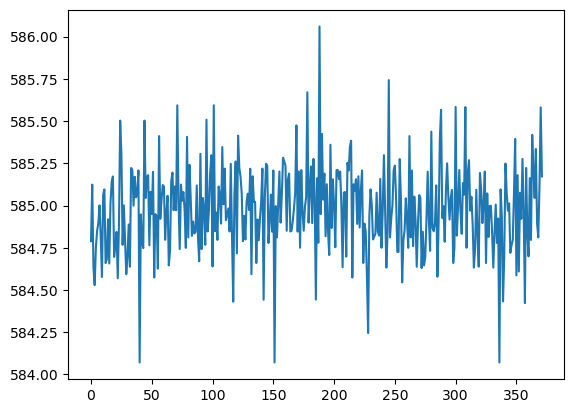

In [38]:
plot = sim_df['Price'].plot()

In [39]:
sim_df['OrderType'].value_counts()

OrderType
2    300
1     72
Name: count, dtype: int64

<Axes: >

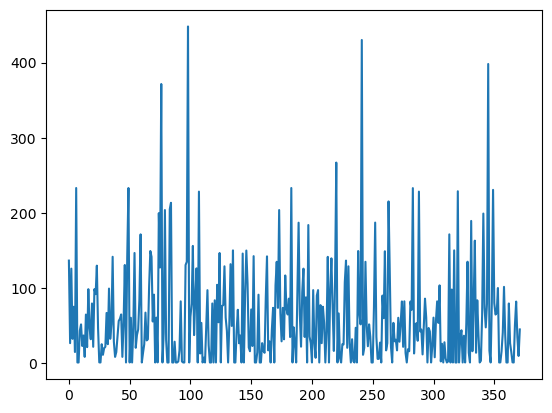

In [40]:
sim_df['Volume'].plot()

In [44]:
from scipy.stats import poisson

# lambda_rate of event_type == 1
type_1_rate = type_1_count / time_duration
print(type_1_rate)

# Generate a Poisson distribution
dis = np.random.poisson(lam=type_1_rate, size=10)

# Get the unique values in the distribution and their counts
values, counts = np.unique(dis, return_counts=True)

# Calculate the probabilities for each unique value
probabilities = counts / len(dis)

# Alternatively, you can get the theoretical probabilities from the Poisson distribution
theoretical_probabilities = poisson.pmf(values, type_1_rate)

print(f"Values: {values}")
print(f"Probabilities: {probabilities}")

3.6631479977776826
Values: [1 2 3 4 6]
Probabilities: [0.1 0.1 0.2 0.5 0.1]


# Testing with an AutoRegressive
Using ARIMA model with my order_type 1 as test

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -197.093
Date:                Fri, 07 Jun 2024   AIC                            404.187
Time:                        12:57:02   BIC                            417.213
Sample:                             0   HQIC                           409.459
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------

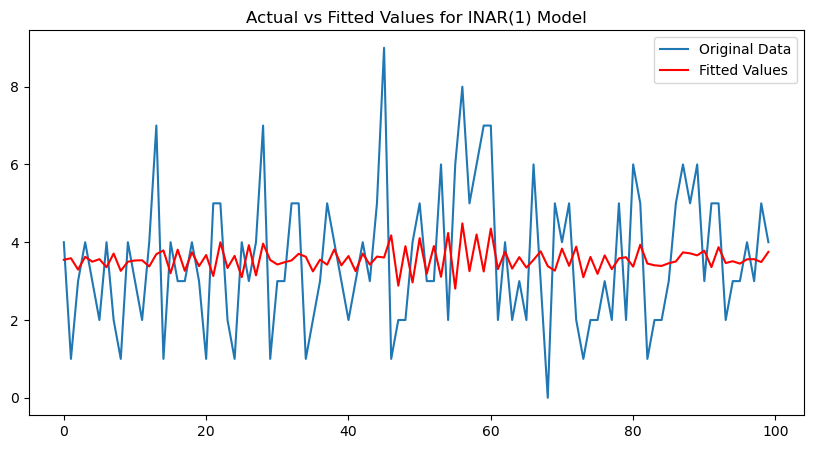

In [52]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Simulating some count data
np.random.seed(42)
data = np.random.poisson(type_1_rate, 100)

# Convert to a pandas Series (optional, for convenience with statsmodels)
data_series = pd.Series(data)

# Fitting an AR model as a stand-in for an INAR model
model = ARIMA(data_series, order=(1,0,0), seasonal_order=(0,0,0,0))
fit_model = model.fit()

# Print the summary of the model
print(fit_model.summary())

# Plot the actual vs predicted values
plt.figure(figsize=(10,5))
plt.plot(data_series, label='Original Data')
plt.plot(fit_model.predict(), label='Fitted Values', color='red')
plt.legend()
plt.title('Actual vs Fitted Values for INAR(1) Model')
plt.show()



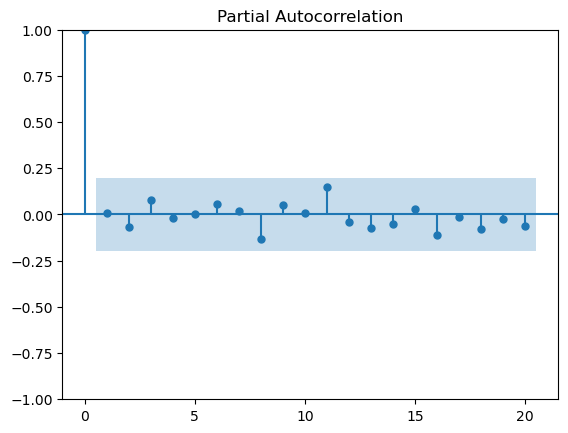

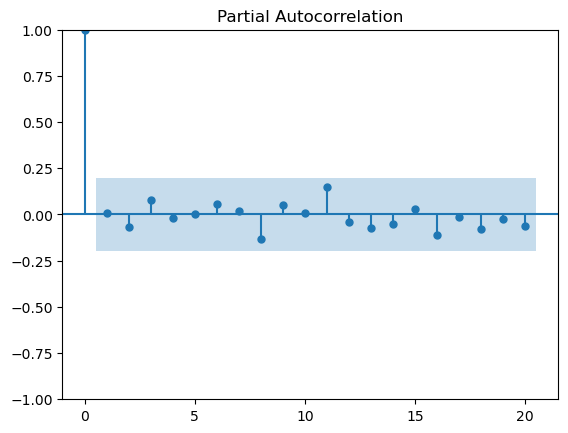

In [46]:
# plot the PACF to check residuals
from statsmodels.graphics.tsaplots import plot_pacf

# Plot the PACF of the residuals
plot_pacf(fit_model.resid, lags=20)

# Researching

In [92]:
merge_df.head()

df_r = merge_df[['Time', 'Size', 'Price', 'mid_price', 'calc_direction', 'event_type']]
df_r.head()

Time  Size    Price  mid_price calc_direction  event_type
0  34200.004241    18  5853300  5856350.0           Sell           1
1  34200.004261    18  5853200  5856350.0           Sell           1
2  34200.004447    18  5853100  5856350.0           Sell           1
3  34200.025552    18  5859100  5856200.0            Buy           2
4  34200.025580    18  5859200  5856200.0            Buy           2

In [104]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import xgboost as xgb

# Sample data preparation (ensure your dataframe is correctly loaded and structured)
df = df_r.copy()

# Convert 'calc_direction' to numeric
le = LabelEncoder()
df['calc_direction'] = le.fit_transform(df['calc_direction'])

# Create lagged features
for lag in range(1, 4):  # You can adjust the number of lags based on your specific needs
    df[f'Time_lag{lag}'] = df['Time'].shift(lag)
    df[f'Size_lag{lag}'] = df['Size'].shift(lag)
    df[f'Price_lag{lag}'] = df['Price'].shift(lag)
    df[f'mid_price_lag{lag}'] = df['mid_price'].shift(lag)
    df[f'calc_direction_lag{lag}'] = df['calc_direction'].shift(lag)

# Drop rows with NaN values resulting from shifts
df = df.dropna()

# Shift the target variable to predict the next event type
df['event_type'] = df['event_type'].shift(-1)
df = df.dropna()

# Feature Scaling
scaler = StandardScaler()
features = [col for col in df.columns if 'lag' in col]
df[features] = scaler.fit_transform(df[features])

# Encode the event type using label encoding (not one-hot)
df['event_type'] = LabelEncoder().fit_transform(df['event_type'])

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df['event_type'], test_size=0.2, random_state=42)

# XGBoost setup for multi-class classification
model = xgb.XGBClassifier(objective='multi:softprob', num_class=df['event_type'].nunique(), eval_metric='mlogloss')

# Training the model
model.fit(X_train, y_train)

# Predicting probabilities
y_pred = model.predict_proba(X_test)

print(y_pred)  # Printing probabilities of each event type


[[2.09077984e-01 2.51025409e-01 4.69146238e-04 ... 2.35430554e-01
  1.77986939e-02 2.80781016e-02]
 [1.50385603e-01 3.46579999e-01 7.89905025e-04 ... 3.27121735e-01
  1.80667825e-02 2.65727751e-02]
 [2.22356737e-01 2.07388759e-01 1.49011565e-03 ... 1.59157053e-01
  1.84943780e-01 7.15078264e-02]
 ...
 [1.54925674e-01 3.44380975e-01 1.73955727e-02 ... 2.86659867e-01
  2.38666441e-02 2.38487087e-02]
 [1.94778472e-01 3.10827672e-01 6.51761016e-04 ... 2.69574434e-01
  1.33599732e-02 2.23152023e-02]
 [4.86797877e-02 1.16490096e-01 8.64748028e-04 ... 1.41566977e-01
  1.09686684e-02 6.24421239e-01]]


In [119]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

def simulate_event_probabilities(model, df, num_steps):
    """
    Simulate future event probabilities using the XGBoost model, starting from the last known data.

    Parameters:
    - model: Trained XGBoost model.
    - df: DataFrame containing the processed data with the same preprocessing applied as during the model's training.
    - num_steps: Length of the simulation (number of future data points to predict).

    Returns:
    - List of numpy arrays, each containing the probabilities of event types for each step.
    """
    # Prepare data from the last row in the DataFrame
    features = [col for col in df.columns if 'lag' in col]
    
    # Scale the features using the same parameters as during training
    scaler = StandardScaler()
    scaler.fit(df[features])  # Fit on the entire DataFrame (or on training data during model training)
    df_scaled = scaler.transform(df[features])
    
    initial_features = df_scaled[-1]  # Start simulation from the last known data point

    current_features = initial_features.copy()
    probabilities_list = []

    for _ in range(num_steps):
        # Reshape current_features to match the model's input shape
        model_input = np.array(current_features).reshape(1, -1)
        
        # Predict the next event type probabilities
        next_event_prob = model.predict_proba(model_input)[0]
        
        # Store the predicted probabilities
        probabilities_list.append(next_event_prob)
        
        # Update current_features for the next prediction
        # Shift features, assume the most probable event affects the last feature
        current_features = np.roll(current_features, -1)
        current_features[-1] = np.argmax(next_event_prob)  # Update with the predicted most likely event

    return probabilities_list

# Example usage:
# num_steps = 50  # Define the number of simulation steps
# probabilities = simulate_event_probabilities(model, df, num_steps)
# print(probabilities)


In [131]:
num_steps = time_duration  # Define the number of simulation steps
probabilities = simulate_event_probabilities(model, df, num_steps)
print(probabilities)

[array([0.30877   , 0.23200884, 0.00250268, 0.00039183, 0.22579141,
       0.15669656, 0.03650646, 0.03733223], dtype=float32), array([0.34237406, 0.04482711, 0.00046399, 0.02999193, 0.2908932 ,
       0.2712703 , 0.00057057, 0.01960881], dtype=float32), array([3.0733475e-02, 1.8578963e-01, 5.8304726e-05, 5.5661644e-03,
       5.5093881e-02, 5.1010066e-01, 4.6366057e-03, 2.0802130e-01],
      dtype=float32), array([6.3792862e-02, 6.9246715e-01, 2.8229694e-04, 2.3235846e-03,
       1.8955807e-01, 4.3043897e-02, 6.2494730e-03, 2.2826237e-03],
      dtype=float32), array([0.00574868, 0.34430486, 0.00173118, 0.00416849, 0.01363799,
       0.5519119 , 0.05812231, 0.02037459], dtype=float32), array([7.27642402e-02, 4.27716076e-01, 3.33931763e-04, 1.60653156e-03,
       7.02413768e-02, 5.76988868e-02, 2.56070524e-01, 1.13568485e-01],
      dtype=float32), array([1.4138375e-01, 2.4326044e-01, 4.8519333e-04, 5.5912858e-01,
       4.0177841e-02, 7.0401421e-03, 9.2688552e-04, 7.5971596e-03],
    

In [132]:
check_out = pd.DataFrame(probabilities)
check_out.columns = ['1','2','3','4','5','6','7','8']
check_out.head()

1         2         3         4         5         6         7  \
0  0.308770  0.232009  0.002503  0.000392  0.225791  0.156697  0.036506   
1  0.342374  0.044827  0.000464  0.029992  0.290893  0.271270  0.000571   
2  0.030733  0.185790  0.000058  0.005566  0.055094  0.510101  0.004637   
3  0.063793  0.692467  0.000282  0.002324  0.189558  0.043044  0.006249   
4  0.005749  0.344305  0.001731  0.004168  0.013638  0.551912  0.058122   

          8  
0  0.037332  
1  0.019609  
2  0.208021  
3  0.002283  
4  0.020375

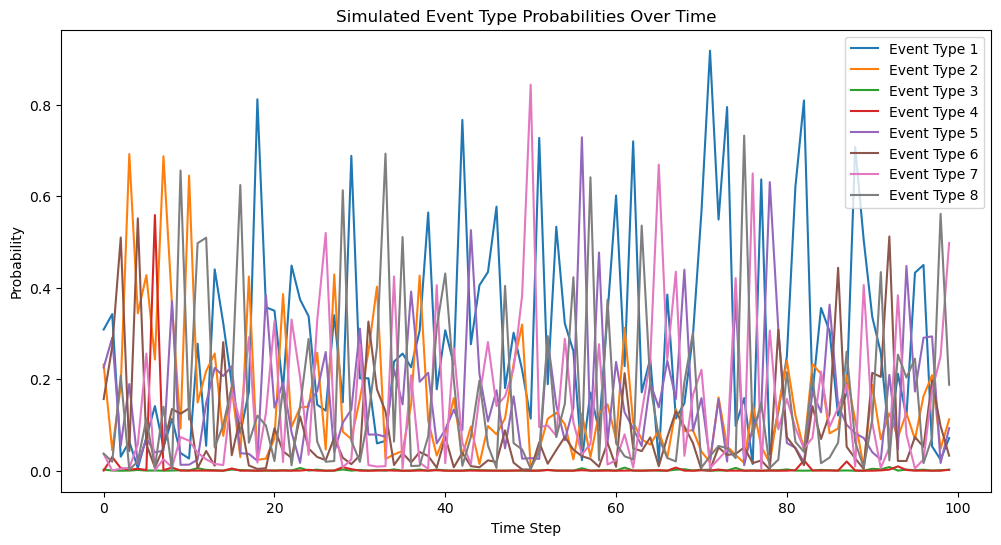

In [138]:
# Plot the probabilities of each event type over time
plt.figure(figsize=(12, 6))
# only take the first 50 rows
for col in check_out.columns:
    plt.plot(check_out[col].iloc[:100], label=f'Event Type {col}')
plt.legend()
plt.title('Simulated Event Type Probabilities Over Time')
plt.xlabel('Time Step')
plt.ylabel('Probability')
plt.show()

We are using XGBoost for time series forecasting. I used some feature engineering to capture some autocorrolations between events. Then I used as a target variable the shifted event_type. so for example  row 0 has for taget variabe row 1 event_type and so on...
At the end it is a classification task to predict for each row which event_type is occuring.

Then we created a function to make some simulations. So given a num_steps (which correspond to a max. time range.
Then I input my XGBoost model to compute point predictions for this specific time range.)

__Check if I have some autocorrolations__

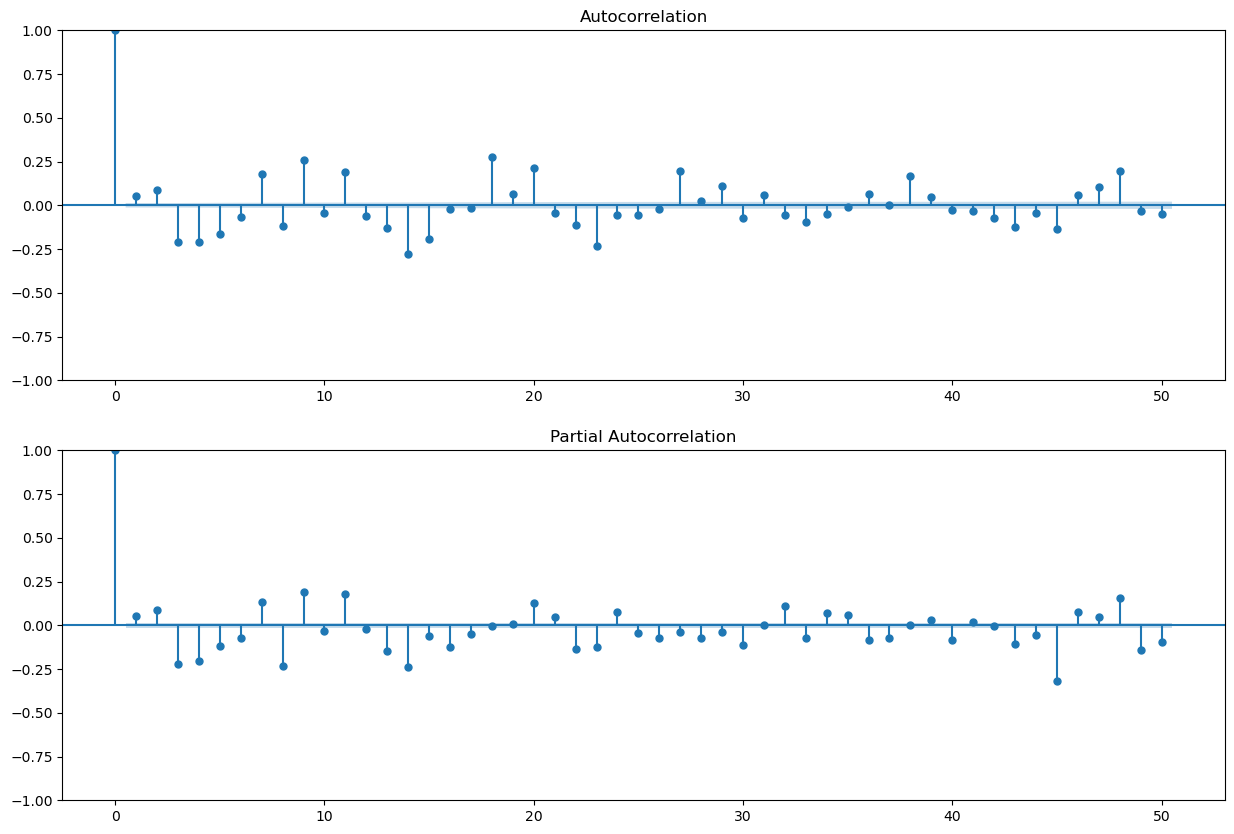

In [154]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2,1, figsize = (15,10))
plot_acf(check_out['1'], lags = 50,  ax=ax[0])
plot_pacf(check_out['1'], lags = 50, method="ols",ax=ax[1])
plt.show()

__Residuals Quick Check__

Even tho we got 66% of errors, we don't really care as the point is just to simulate

In [147]:


# Plot the PACF of the residuals
residuals = y_test - y_pred # 0 = correcot non zero = incorrect
#check how many are non 0
print(np.count_nonzero(residuals)/len(residuals))


0.6622081740322824
